In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


# Step 1.1: Install required libraries (run this first in Kaggle)

In [2]:
!pip install scikit-learn xgboost matplotlib seaborn plotly --quiet

# Step 1.2: Import all necessary libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Machine Learning libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

# Model serialization
import joblib

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


# Step 1.3: Load the dataset

In [4]:
# Step 1.4: Load the Telco Churn dataset
try:
    # Try common file names for this dataset
    df = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
    print("✅ Dataset loaded successfully from primary path!")
except:
    try:
        df = pd.read_csv('/kaggle/input/ibm-telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
        print("✅ Dataset loaded successfully from alternative path!")
    except:
        print("❌ Please check the dataset path and update the code accordingly")
        # If the above paths don't work, you might need to adjust based on your dataset location

✅ Dataset loaded successfully from primary path!


# Step 1.5: Initial data inspection

In [5]:

print("📊 DATASET OVERVIEW:")
print(f"Dataset shape: {df.shape}")
print(f"Number of customers: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")



📊 DATASET OVERVIEW:
Dataset shape: (7043, 21)
Number of customers: 7043
Number of features: 21


In [6]:
print("\\n🔍 FIRST 5 ROWS:")
df.head(10)



\n🔍 FIRST 5 ROWS:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [7]:
print("📋 DATASET INFO:")
df.info()



📋 DATASET INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non

In [8]:
print("\\n📈 BASIC STATISTICS:")
df.describe()

\n📈 BASIC STATISTICS:


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# STEP 2: Data Quality Assessment & Missing Value Analysis
## Thoroughly examination of  data quality, identify missing values, check data types, and understand the target variable distribution.

# Step 2.1: Comprehensive Data Quality Check

In [9]:

print("🔍 COMPREHENSIVE DATA QUALITY ASSESSMENT")

print("\n📊 MISSING VALUES ANALYSIS:")
print(df.isnull().sum())

print("\n🎯 TARGET VARIABLE DISTRIBUTION (CHURN):")
churn_counts = df['Churn'].value_counts()
churn_percentages = df['Churn'].value_counts(normalize=True) * 100
print(churn_counts)
print(f"\nChurn Rate: {churn_percentages['Yes']:.2f}%")
print(f"Retention Rate: {churn_percentages['No']:.2f}%")

🔍 COMPREHENSIVE DATA QUALITY ASSESSMENT

📊 MISSING VALUES ANALYSIS:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

🎯 TARGET VARIABLE DISTRIBUTION (CHURN):
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Churn Rate: 26.54%
Retention Rate: 73.46%



# Step 2.2: Check for hidden missing values or data issues

In [10]:

print("\n🔎 CHECKING FOR DATA ISSUES:")

# Check for unexpected values in categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
print("\nUnique values in categorical columns:")
for col in categorical_columns:
    if col != 'customerID':  # Skip customer ID
        print(f"{col}: {df[col].unique()}")


🔎 CHECKING FOR DATA ISSUES:

Unique values in categorical columns:
gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn: ['No' 'Yes']


# Step 2.3: Check TotalCharges column (appears as object but should be numeric)

In [11]:


print(f"\n💰 TOTALCHARGES DATA TYPE ISSUE:")
print(f"TotalCharges dtype: {df['TotalCharges'].dtype}")
print(f"Sample values: {df['TotalCharges'].head(10).values}")

# Check for empty strings or non-numeric values in TotalCharges
total_charges_issues = df[df['TotalCharges'] == ' ']
print(f"Number of empty values in TotalCharges: {len(total_charges_issues)}")


💰 TOTALCHARGES DATA TYPE ISSUE:
TotalCharges dtype: object
Sample values: ['29.85' '1889.5' '108.15' '1840.75' '151.65' '820.5' '1949.4' '301.9'
 '3046.05' '3487.95']
Number of empty values in TotalCharges: 11


# Step 2.4: Visualize churn distribution

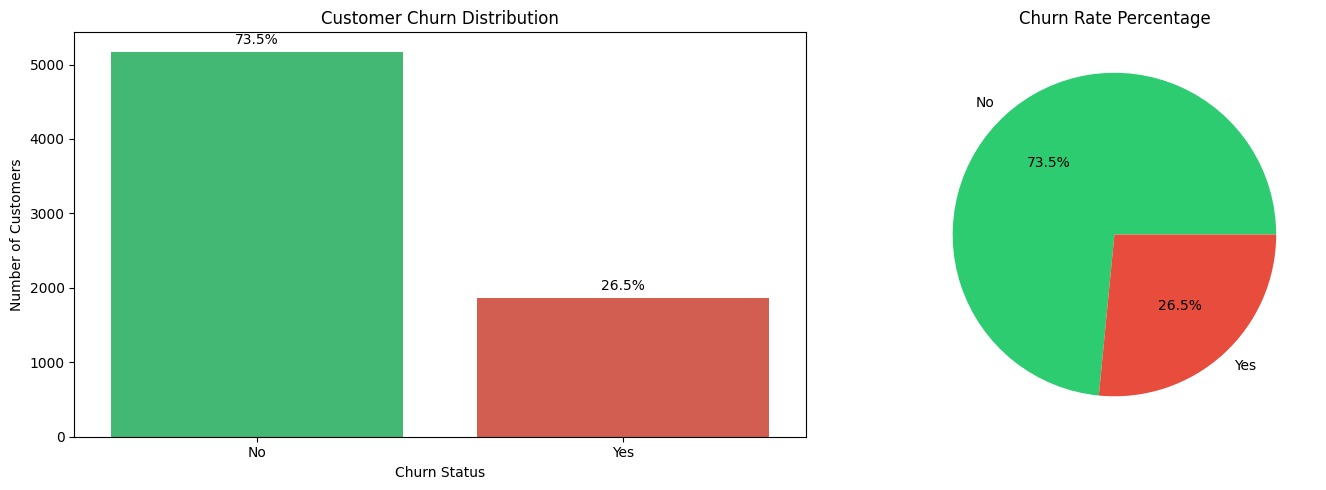

In [12]:

plt.figure(figsize=(15, 5))

# Subplot 1: Churn count plot
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='Churn', palette=['#2ecc71', '#e74c3c'])
plt.title('Customer Churn Distribution')
plt.xlabel('Churn Status')
plt.ylabel('Number of Customers')

# Add percentage labels
total = len(df)
for i, p in enumerate(plt.gca().patches):
    percentage = f'{100 * p.get_height() / total:.1f}%'
    plt.gca().text(p.get_x() + p.get_width() / 2, p.get_height() + 100,
                  percentage, ha='center')

# Subplot 2: Churn percentage pie chart
plt.subplot(1, 2, 2)
churn_counts.plot(kind='pie', autopct='%1.1f%%', colors=['#2ecc71', '#e74c3c'])
plt.title('Churn Rate Percentage')
plt.ylabel('')

plt.tight_layout()
plt.show()


In [13]:

# Step 2.5: Data types summary
print("\n📋 DATA TYPES SUMMARY:")
print(df.dtypes)

print("\n✅ DATA QUALITY ASSESSMENT COMPLETE!")


📋 DATA TYPES SUMMARY:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

✅ DATA QUALITY ASSESSMENT COMPLETE!


# Step 3.1: Create a copy of the dataframe for cleaning

In [14]:

df_clean = df.copy()
print("🧹 STARTING DATA CLEANING PROCESS...")

🧹 STARTING DATA CLEANING PROCESS...


# Step 3.2: Fix TotalCharges - convert to numeric and handle empty values

In [15]:
print(f"\n🔧 FIXING TOTALCHARGES COLUMN:")
print(f"Empty values found: {len(df_clean[df_clean['TotalCharges'] == ' '])}")

# Replace empty strings with NaN and convert to numeric
df_clean['TotalCharges'] = df_clean['TotalCharges'].replace(' ', np.nan)
df_clean['TotalCharges'] = pd.to_numeric(df_clean['TotalCharges'])

print(f"Missing values after conversion: {df_clean['TotalCharges'].isnull().sum()}")



🔧 FIXING TOTALCHARGES COLUMN:
Empty values found: 11
Missing values after conversion: 11


# Step 3.3: Analyze rows with missing TotalCharges

In [16]:
print(f"\n📋 ANALYSIS OF ROWS WITH MISSING TOTALCHARGES:")
missing_total_charges = df_clean[df_clean['TotalCharges'].isnull()]
print(f"Number of rows with missing TotalCharges: {len(missing_total_charges)}")
print(f"Tenure distribution for these rows: {missing_total_charges['tenure'].value_counts()}")

# For customers with tenure=0 and missing TotalCharges, set TotalCharges = 0
df_clean.loc[df_clean['TotalCharges'].isnull(), 'TotalCharges'] = 0

print(f"Missing values after imputation: {df_clean['TotalCharges'].isnull().sum()}")


📋 ANALYSIS OF ROWS WITH MISSING TOTALCHARGES:
Number of rows with missing TotalCharges: 11
Tenure distribution for these rows: tenure
0    11
Name: count, dtype: int64
Missing values after imputation: 0


In [17]:
df_clean

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


# Step 3.4: Standardize categorical values

In [18]:
print(f"\n🔄 STANDARDIZING CATEGORICAL VALUES:")

# Combine "No internet service" and "No phone service" with "No" for modeling
columns_to_standardize = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 
                         'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for col in columns_to_standardize:
    df_clean[col] = df_clean[col].replace({'No internet service': 'No', 'No phone service': 'No'})
    print(f"Standardized {col}: {df_clean[col].unique()}")


🔄 STANDARDIZING CATEGORICAL VALUES:
Standardized MultipleLines: ['No' 'Yes']
Standardized OnlineSecurity: ['No' 'Yes']
Standardized OnlineBackup: ['Yes' 'No']
Standardized DeviceProtection: ['No' 'Yes']
Standardized TechSupport: ['No' 'Yes']
Standardized StreamingTV: ['No' 'Yes']
Standardized StreamingMovies: ['No' 'Yes']


# Step 3.5: Verify the cleaning

In [19]:
print(f"\n✅ CLEANING VERIFICATION:")
print(f"Dataset shape: {df_clean.shape}")
print(f"Data types after cleaning:")
print(df_clean.dtypes)

print(f"\n📊 MISSING VALUES AFTER CLEANING:")
print(df_clean.isnull().sum().sum())  # Should be 0


✅ CLEANING VERIFICATION:
Dataset shape: (7043, 21)
Data types after cleaning:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

📊 MISSING VALUES AFTER CLEANING:
0


# Step 3.6: Visualize the cleaned numeric features

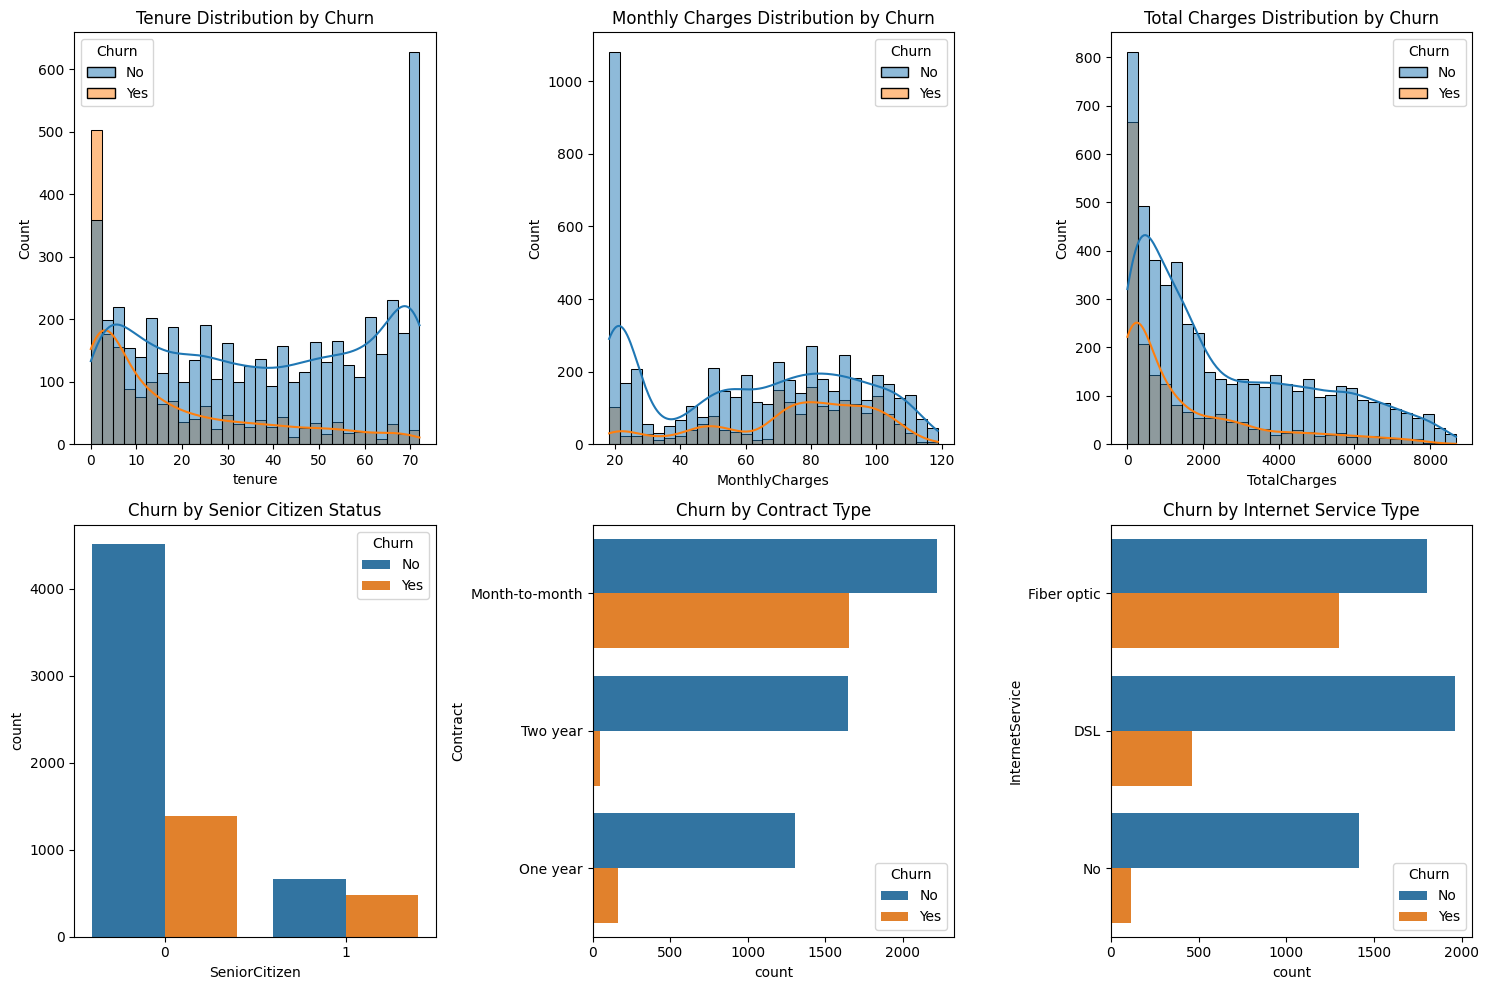


🎯 FINAL DATA QUALITY CHECK:
Total records: 7043
Churn rate: 26.54%
Data types confirmed - TotalCharges is now: float64

✅ DATA CLEANING COMPLETED SUCCESSFULLY!


In [20]:
plt.figure(figsize=(15, 10))

# Subplot 1: Tenure distribution
plt.subplot(2, 3, 1)
sns.histplot(data=df_clean, x='tenure', hue='Churn', bins=30, kde=True)
plt.title('Tenure Distribution by Churn')

# Subplot 2: MonthlyCharges distribution
plt.subplot(2, 3, 2)
sns.histplot(data=df_clean, x='MonthlyCharges', hue='Churn', bins=30, kde=True)
plt.title('Monthly Charges Distribution by Churn')

# Subplot 3: TotalCharges distribution
plt.subplot(2, 3, 3)
sns.histplot(data=df_clean, x='TotalCharges', hue='Churn', bins=30, kde=True)
plt.title('Total Charges Distribution by Churn')

# Subplot 4: SeniorCitizen vs Churn
plt.subplot(2, 3, 4)
sns.countplot(data=df_clean, x='SeniorCitizen', hue='Churn')
plt.title('Churn by Senior Citizen Status')

# Subplot 5: Contract type vs Churn
plt.subplot(2, 3, 5)
sns.countplot(data=df_clean, y='Contract', hue='Churn', order=df_clean['Contract'].value_counts().index)
plt.title('Churn by Contract Type')

# Subplot 6: Internet Service vs Churn
plt.subplot(2, 3, 6)
sns.countplot(data=df_clean, y='InternetService', hue='Churn', order=df_clean['InternetService'].value_counts().index)
plt.title('Churn by Internet Service Type')

plt.tight_layout()
plt.show()

# Step 3.7: Final data quality check
print(f"\n🎯 FINAL DATA QUALITY CHECK:")
print(f"Total records: {len(df_clean)}")
print(f"Churn rate: {(df_clean['Churn'] == 'Yes').sum() / len(df_clean) * 100:.2f}%")
print(f"Data types confirmed - TotalCharges is now: {df_clean['TotalCharges'].dtype}")

print("\n✅ DATA CLEANING COMPLETED SUCCESSFULLY!")

### Tenure Distribution by Churn

Customers with low tenure (new customers) churn significantly more.

Longer-tenure customers are more likely to stay.

Suggests the need to improve early customer experience and retention.

Monthly Charges Distribution by Churn

Higher monthly charges are linked to higher churn.

Customers with lower charges are more loyal.

Indicates potential price sensitivity among customers.

Total Charges Distribution by Churn

Low total charges correspond to higher churn — mostly new customers leaving early.

High total charges indicate long-term, loyal customers.

Churn by Senior Citizen Status

Senior citizens show a higher churn rate compared to younger customers.

May reflect differences in technology comfort or price sensitivity.

Churn by Contract Type

Month-to-month customers churn the most.

One-year and two-year contracts have lower churn.

Long-term contracts promote customer retention.

Churn by Internet Service Type

Fiber optic users churn the most.

DSL and no-internet-service users churn less.

Could indicate higher dissatisfaction or cost concerns among fiber users

STEP 4: Exploratory Data Analysis (EDA) & Feature Engineering

📊 COMPREHENSIVE EXPLORATORY DATA ANALYSIS


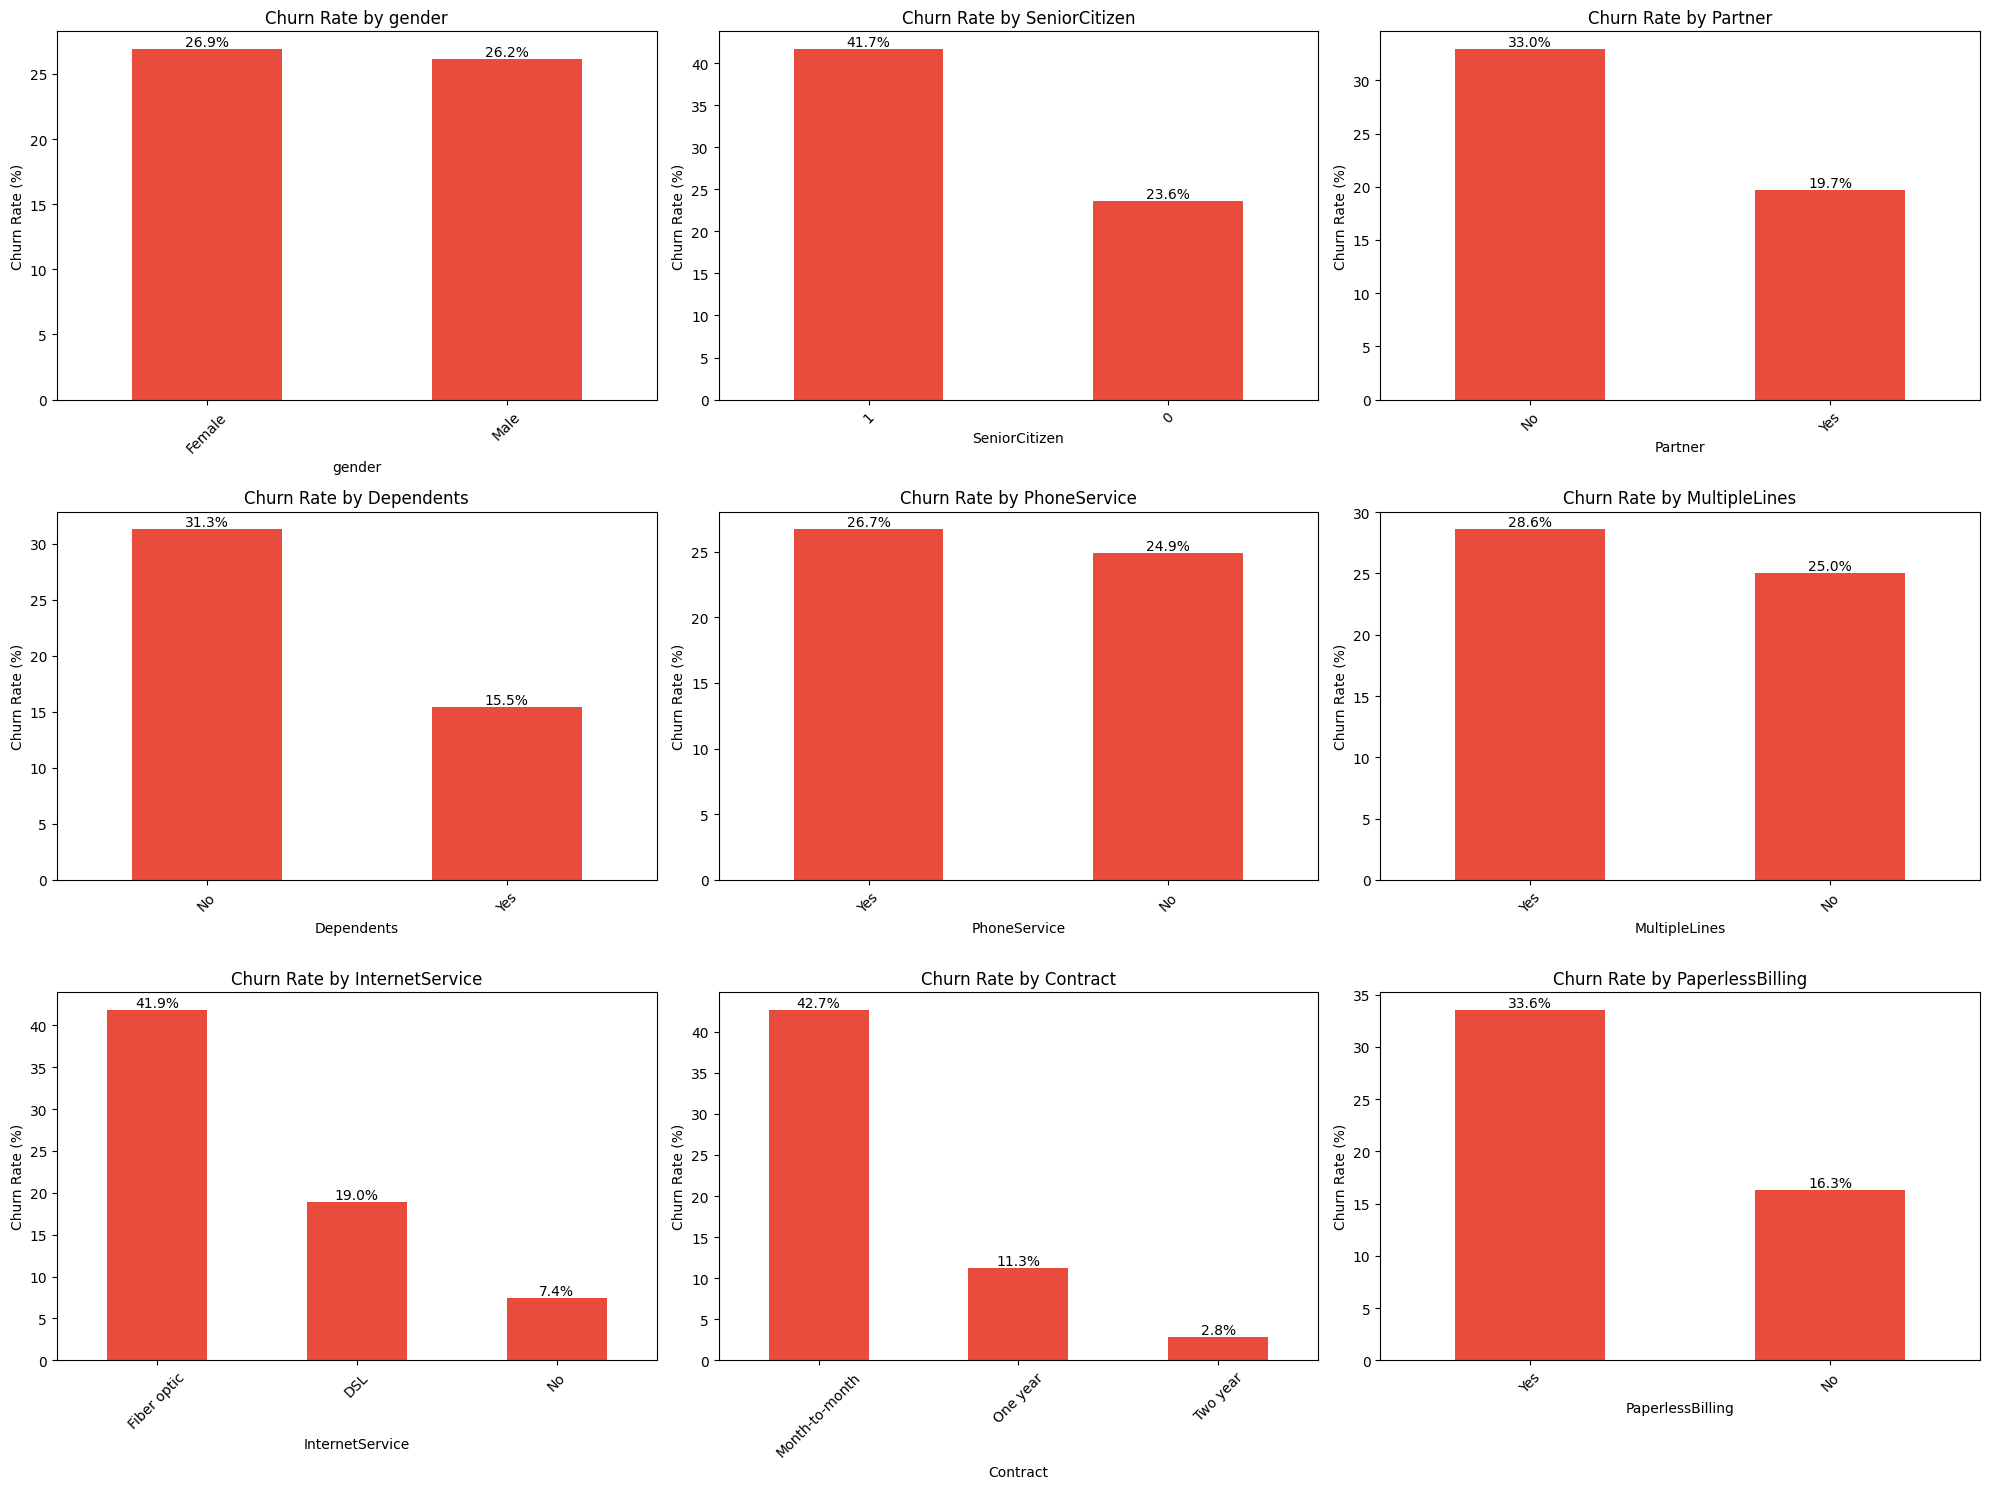


🔗 CORRELATION ANALYSIS:


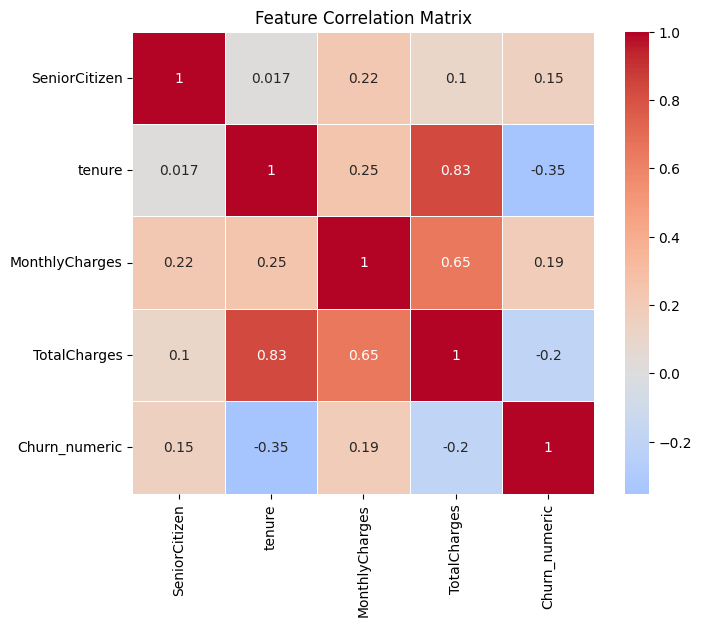

Correlation with Churn:
Churn_numeric     1.000000
MonthlyCharges    0.193356
SeniorCitizen     0.150889
TotalCharges     -0.198324
tenure           -0.352229
Name: Churn_numeric, dtype: float64

⚙️ FEATURE ENGINEERING:
New features created:
- TenureGroup: ['0-1 Year' '2-3 Years' '3-4 Years' '1-2 Years' '5+ Years' '4-5 Years']
- MonthlyChargeGroup: ['Low', 'Medium', 'High', 'Very High']
Categories (4, object): ['Low' < 'Medium' < 'High' < 'Very High']
- TotalServices: Range 0 to 7


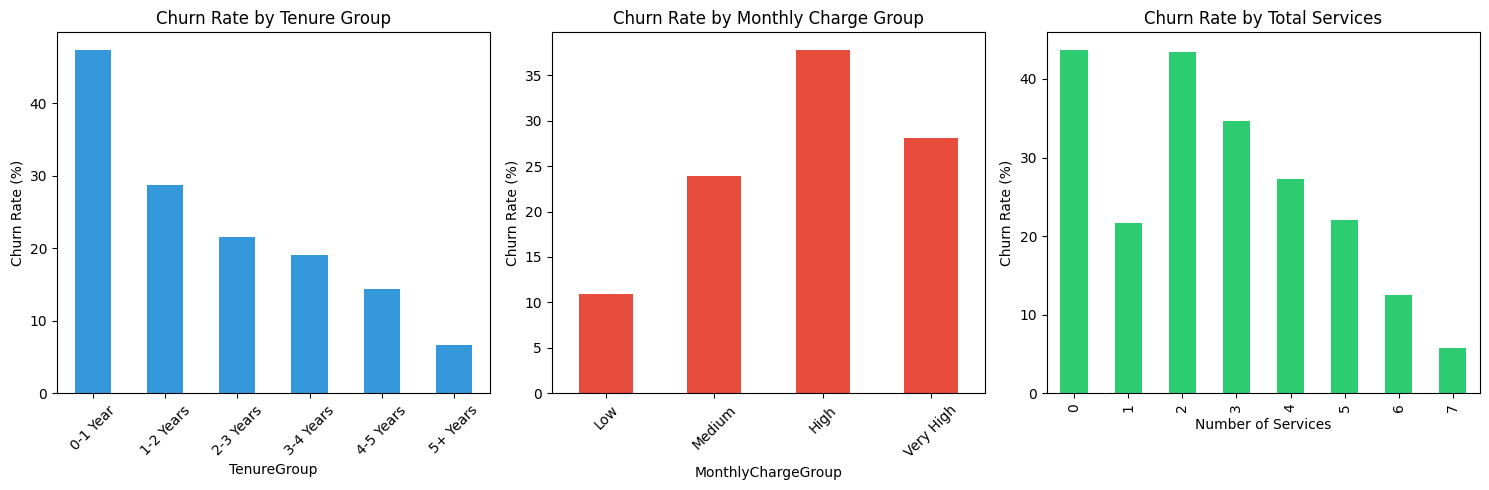


💡 KEY BUSINESS INSIGHTS:
1. Contract Impact: Month-to-month churn rate: 42.7% vs Two year: 2.8%
2. Internet Service: Fiber optic churn rate: 41.9% vs DSL: 19.0%
3. Tenure Impact: New customers (0-1 Year) churn: 47.4% vs Loyal customers (5+ Years): 6.6%
4. Payment Method: Highest churn with 'Electronic check': 45.3%

✅ EDA & FEATURE ENGINEERING COMPLETED!


In [21]:
# Step 4.1: Comprehensive EDA - Churn Analysis by Key Features
print("📊 COMPREHENSIVE EXPLORATORY DATA ANALYSIS")

# Step 4.2: Churn rate by categorical features
categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 
                       'MultipleLines', 'InternetService', 'Contract', 'PaperlessBilling', 'PaymentMethod']

plt.figure(figsize=(20, 15))

for i, feature in enumerate(categorical_features[:9], 1):
    plt.subplot(3, 3, i)
    
    # Calculate churn rates
    churn_rate = df_clean.groupby(feature)['Churn'].value_counts(normalize=True).unstack()['Yes'] * 100
    
    # Create bar plot
    bars = churn_rate.sort_values(ascending=False).plot(kind='bar', color='#e74c3c')
    plt.title(f'Churn Rate by {feature}')
    plt.ylabel('Churn Rate (%)')
    plt.xticks(rotation=45)
    
    # Add value labels on bars
    for p in bars.patches:
        bars.annotate(f'{p.get_height():.1f}%', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', 
                     xytext=(0, 5), 
                     textcoords='offset points')

plt.tight_layout()
plt.show()

# Step 4.3: Correlation Analysis
print("\n🔗 CORRELATION ANALYSIS:")

# Convert target to numeric for correlation
df_clean['Churn_numeric'] = df_clean['Churn'].map({'No': 0, 'Yes': 1})

# Select numeric columns for correlation
numeric_columns = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn_numeric']
correlation_matrix = df_clean[numeric_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()

print("Correlation with Churn:")
print(correlation_matrix['Churn_numeric'].sort_values(ascending=False))

# Step 4.4: Feature Engineering - Create new features
print("\n⚙️ FEATURE ENGINEERING:")

# Create tenure groups
def tenure_group(tenure):
    if tenure <= 12:
        return '0-1 Year'
    elif tenure <= 24:
        return '1-2 Years'
    elif tenure <= 36:
        return '2-3 Years'
    elif tenure <= 48:
        return '3-4 Years'
    elif tenure <= 60:
        return '4-5 Years'
    else:
        return '5+ Years'

df_clean['TenureGroup'] = df_clean['tenure'].apply(tenure_group)

# Create monthly charge groups
df_clean['MonthlyChargeGroup'] = pd.cut(df_clean['MonthlyCharges'], 
                                       bins=[0, 35, 70, 100, 120], 
                                       labels=['Low', 'Medium', 'High', 'Very High'])

# Create total services count
services = ['PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
           'TechSupport', 'StreamingTV', 'StreamingMovies']

df_clean['TotalServices'] = df_clean[services].apply(lambda x: (x == 'Yes').sum(), axis=1)

print("New features created:")
print(f"- TenureGroup: {df_clean['TenureGroup'].unique()}")
print(f"- MonthlyChargeGroup: {df_clean['MonthlyChargeGroup'].unique()}")
print(f"- TotalServices: Range {df_clean['TotalServices'].min()} to {df_clean['TotalServices'].max()}")

# Step 4.5: Analyze new features
plt.figure(figsize=(15, 5))

# Subplot 1: Churn rate by tenure group
plt.subplot(1, 3, 1)
tenure_churn = df_clean.groupby('TenureGroup')['Churn_numeric'].mean() * 100
tenure_churn.plot(kind='bar', color='#3498db')
plt.title('Churn Rate by Tenure Group')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=45)

# Subplot 2: Churn rate by monthly charge group
plt.subplot(1, 3, 2)
charge_churn = df_clean.groupby('MonthlyChargeGroup')['Churn_numeric'].mean() * 100
charge_churn.plot(kind='bar', color='#e74c3c')
plt.title('Churn Rate by Monthly Charge Group')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=45)

# Subplot 3: Churn rate by total services
plt.subplot(1, 3, 3)
services_churn = df_clean.groupby('TotalServices')['Churn_numeric'].mean() * 100
services_churn.plot(kind='bar', color='#2ecc71')
plt.title('Churn Rate by Total Services')
plt.ylabel('Churn Rate (%)')
plt.xlabel('Number of Services')

plt.tight_layout()
plt.show()

# Step 4.6: Key Business Insights
print("\n💡 KEY BUSINESS INSIGHTS:")

# Insight 1: Contract type impact
contract_churn = df_clean.groupby('Contract')['Churn_numeric'].mean() * 100
print(f"1. Contract Impact: Month-to-month churn rate: {contract_churn['Month-to-month']:.1f}% vs " 
      f"Two year: {contract_churn['Two year']:.1f}%")

# Insight 2: Internet service impact
internet_churn = df_clean.groupby('InternetService')['Churn_numeric'].mean() * 100
print(f"2. Internet Service: Fiber optic churn rate: {internet_churn['Fiber optic']:.1f}% vs "
      f"DSL: {internet_churn['DSL']:.1f}%")

# Insight 3: Tenure impact
tenure_impact = df_clean.groupby('TenureGroup')['Churn_numeric'].mean() * 100
print(f"3. Tenure Impact: New customers (0-1 Year) churn: {tenure_impact['0-1 Year']:.1f}% vs "
      f"Loyal customers (5+ Years): {tenure_impact['5+ Years']:.1f}%")

# Insight 4: Payment method impact
payment_churn = df_clean.groupby('PaymentMethod')['Churn_numeric'].mean() * 100
highest_payment = payment_churn.idxmax()
print(f"4. Payment Method: Highest churn with '{highest_payment}': {payment_churn[highest_payment]:.1f}%")

print("\n✅ EDA & FEATURE ENGINEERING COMPLETED!")

# STEP 5: Data Preprocessing & Feature Encoding

# Step 5.1: Prepare final dataset for modeling

In [22]:
print("🛠️ DATA PREPROCESSING & FEATURE ENCODING")

# Create final feature set (excluding customerID and temporary columns)
features_to_drop = ['customerID', 'Churn_numeric']
X = df_clean.drop(features_to_drop + ['Churn'], axis=1)
y = df_clean['Churn']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

🛠️ DATA PREPROCESSING & FEATURE ENCODING
Features shape: (7043, 22)
Target shape: (7043,)


# Step 5.2: Identify feature types

In [23]:

categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"\n📋 FEATURE TYPES:")
print(f"Categorical features ({len(categorical_features)}): {categorical_features}")
print(f"Numerical features ({len(numerical_features)}): {numerical_features}")



📋 FEATURE TYPES:
Categorical features (16): ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TenureGroup']
Numerical features (5): ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'TotalServices']



# Step 5.3: Create preprocessing pipelines

In [24]:


from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Preprocessing for numerical features
numerical_transformer = StandardScaler()

# Preprocessing for categorical features
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first', sparse_output=False))  # drop='first' to avoid multicollinearity
])

# Bundle preprocessing for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

print("\n✅ PREPROCESSING PIPELINE CREATED")



✅ PREPROCESSING PIPELINE CREATED


# Step 5.4: Split data into training and testing sets

In [25]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y  # Important for imbalanced datasets
)

print(f"\n📊 TRAIN-TEST SPLIT:")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")
print(f"Training churn rate: {(y_train == 'Yes').mean():.2%}")
print(f"Testing churn rate: {(y_test == 'Yes').mean():.2%}")



📊 TRAIN-TEST SPLIT:
Training set: 5634 samples
Testing set: 1409 samples
Training churn rate: 26.54%
Testing churn rate: 26.54%



# Step 5.5: Fit preprocessing on training data and transform both sets

In [26]:

print("\n🔧 APPLYING PREPROCESSING...")

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Get feature names after one-hot encoding
feature_names = numerical_features.copy()
for col in categorical_features:
    categories = preprocessor.named_transformers_['cat'].named_steps['onehot'].categories_[categorical_features.index(col)]
    for category in categories[1:]:  # Skip first category due to drop='first'
        feature_names.append(f"{col}_{category}")

print(f"\n📏 PROCESSED FEATURE DIMENSIONS:")
print(f"X_train_processed shape: {X_train_processed.shape}")
print(f"X_test_processed shape: {X_test_processed.shape}")
print(f"Number of features after encoding: {len(feature_names)}")


🔧 APPLYING PREPROCESSING...

📏 PROCESSED FEATURE DIMENSIONS:
X_train_processed shape: (5634, 29)
X_test_processed shape: (1409, 29)
Number of features after encoding: 29


# Step 5.6: Convert target to binary

In [27]:

y_train_binary = (y_train == 'Yes').astype(int)
y_test_binary = (y_test == 'Yes').astype(int)

print(f"\n🎯 TARGET DISTRIBUTION:")
print(f"Training - Churn: {y_train_binary.sum()}, No Churn: {len(y_train_binary) - y_train_binary.sum()}")
print(f"Testing - Churn: {y_test_binary.sum()}, No Churn: {len(y_test_binary) - y_test_binary.sum()}")



🎯 TARGET DISTRIBUTION:
Training - Churn: 1495, No Churn: 4139
Testing - Churn: 374, No Churn: 1035


# Step 5.7: Save preprocessing pipeline for later use

In [28]:

import joblib

joblib.dump(preprocessor, 'preprocessor.pkl')
print("✅ Preprocessing pipeline saved as 'preprocessor.pkl'")

✅ Preprocessing pipeline saved as 'preprocessor.pkl'



🔍 SAMPLE OF PROCESSED FEATURES (first 5 rows, first 10 features):
   SeniorCitizen    tenure  MonthlyCharges  TotalCharges  TotalServices  \
0      -0.441773  0.102371       -0.521976     -0.262257       0.022263   
1      -0.441773 -0.711743        0.337478     -0.503635      -0.518388   
2      -0.441773 -0.793155       -0.809013     -0.749883       0.022263   
3      -0.441773 -0.263980        0.284384     -0.172722       1.103566   
4      -0.441773 -1.281624       -0.676279     -0.989374      -1.059040   

   gender_Male  Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0          1.0          0.0             0.0               0.0   
1          1.0          1.0             1.0               1.0   
2          1.0          1.0             1.0               0.0   
3          0.0          1.0             0.0               1.0   
4          1.0          1.0             1.0               1.0   

   MultipleLines_Yes  
0                0.0  
1                0.0  
2                0.0  

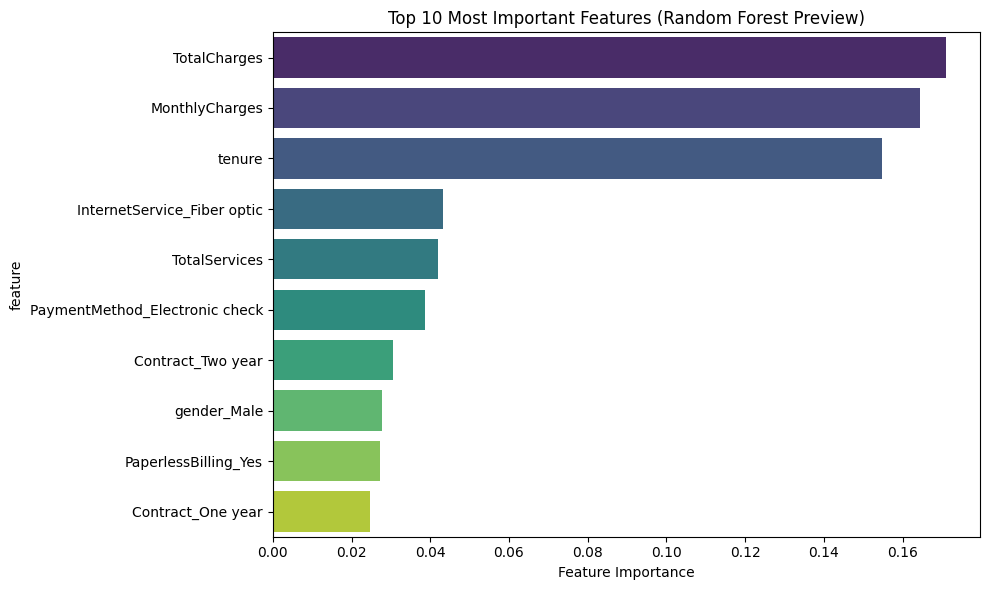


✅ DATA PREPROCESSING COMPLETED SUCCESSFULLY!


In [29]:

# Step 5.8: Display first few processed features
print(f"\n🔍 SAMPLE OF PROCESSED FEATURES (first 5 rows, first 10 features):")
processed_sample = pd.DataFrame(X_train_processed[:5, :10], columns=feature_names[:10])
print(processed_sample)

# Step 5.9: Feature importance preview (using simple model)
from sklearn.ensemble import RandomForestClassifier

# Train a quick Random Forest to see feature importance
rf_preview = RandomForestClassifier(n_estimators=100, random_state=42)
rf_preview.fit(X_train_processed, y_train_binary)

# Get feature importance
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': rf_preview.feature_importances_
}).sort_values('importance', ascending=False)

print(f"\n📊 TOP 10 MOST IMPORTANT FEATURES (Preview):")
print(feature_importance.head(10))

# Visualize top features
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance.head(10), x='importance', y='feature', palette='viridis')
plt.title('Top 10 Most Important Features (Random Forest Preview)')
plt.xlabel('Feature Importance')
plt.tight_layout()
plt.show()

print("\n✅ DATA PREPROCESSING COMPLETED SUCCESSFULLY!")

🤖 MULTIPLE MODEL TRAINING & EVALUATION
🚀 TRAINING MODELS...

📊 Training Logistic Regression...
✅ Logistic Regression trained - Accuracy: 0.8041, ROC-AUC: 0.8431

📊 Training Random Forest...
✅ Random Forest trained - Accuracy: 0.7878, ROC-AUC: 0.8253

📊 Training XGBoost...
✅ XGBoost trained - Accuracy: 0.7828, ROC-AUC: 0.8285

📊 Training Support Vector Machine...
✅ Support Vector Machine trained - Accuracy: 0.7892, ROC-AUC: 0.7962

📈 MODEL PERFORMANCE COMPARISON
                    Model  Accuracy   ROC-AUC
0     Logistic Regression  0.804116  0.843083
2                 XGBoost  0.782825  0.828453
1           Random Forest  0.787793  0.825331
3  Support Vector Machine  0.789212  0.796236


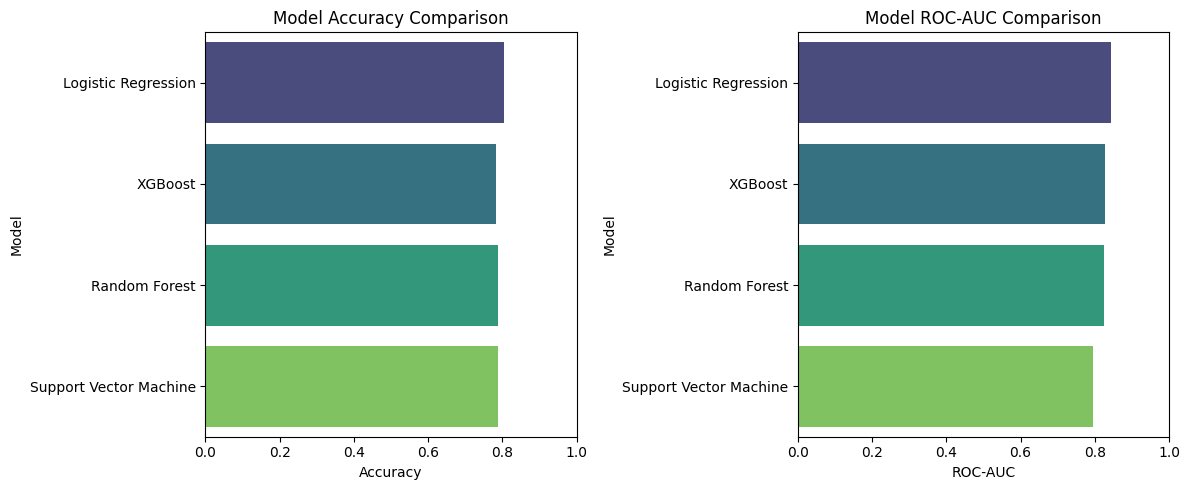


🏆 BEST PERFORMING MODEL: Logistic Regression
📊 Accuracy: 0.8041
📊 ROC-AUC: 0.8431

📋 DETAILED CLASSIFICATION REPORT - Logistic Regression:
              precision    recall  f1-score   support

    No Churn       0.84      0.90      0.87      1035
       Churn       0.67      0.53      0.59       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.80      1409



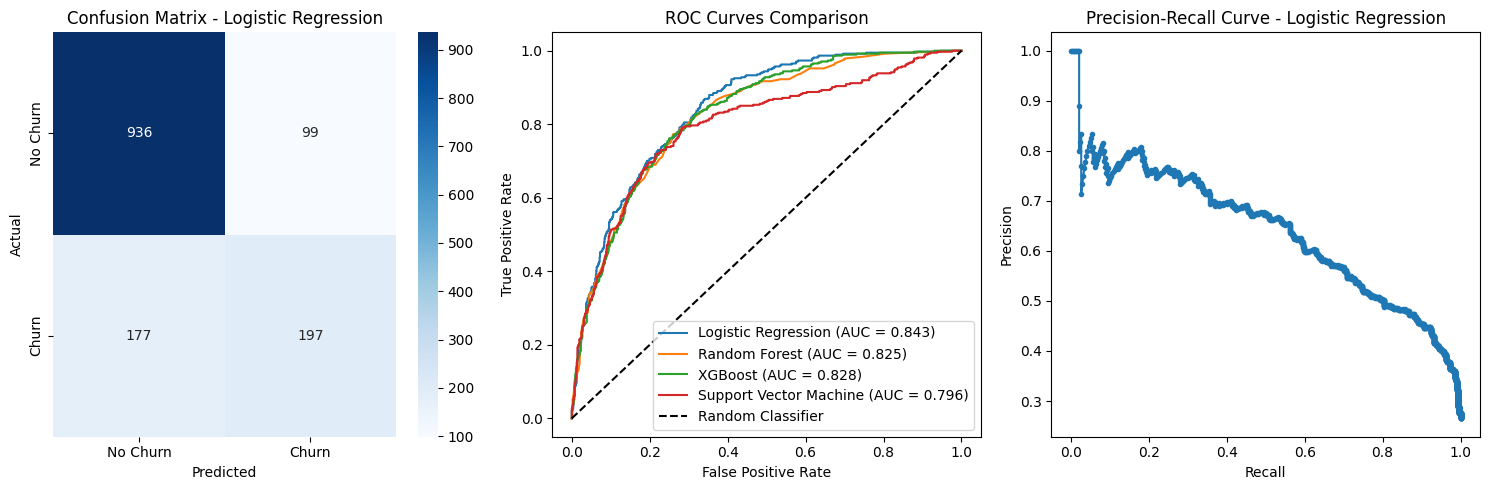


💼 BUSINESS IMPACT ANALYSIS - Logistic Regression:
True Positives (Correctly identified churners): 197
False Negatives (Missed churners): 177
True Negatives (Correctly identified loyal customers): 936
False Positives (False alarms): 99

📊 Key Performance Metrics:
Recall (Sensitivity): 52.67% - Ability to catch churners
Precision: 66.55% - Accuracy of churn predictions
Specificity: 90.43% - Ability to identify loyal customers

💰 ESTIMATED BUSINESS IMPACT:
Missed churners: 177
Potential savings from better detection: $88,500.00

✅ MODEL TRAINING & EVALUATION COMPLETED!


In [30]:
# Step 6.1: Initialize multiple classification models
print("🤖 MULTIPLE MODEL TRAINING & EVALUATION")

models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, eval_metric='logloss'),
    'Support Vector Machine': SVC(random_state=42, probability=True)
}

# Step 6.2: Train and evaluate models
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve

results = {}
model_predictions = {}

print("🚀 TRAINING MODELS...")

for name, model in models.items():
    print(f"\n📊 Training {name}...")
    
    # Train model
    model.fit(X_train_processed, y_train_binary)
    
    # Make predictions
    y_pred = model.predict(X_test_processed)
    y_pred_proba = model.predict_proba(X_test_processed)[:, 1]
    
    # Calculate metrics
    accuracy = accuracy_score(y_test_binary, y_pred)
    roc_auc = roc_auc_score(y_test_binary, y_pred_proba)
    
    # Store results
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'roc_auc': roc_auc,
        'predictions': y_pred,
        'probabilities': y_pred_proba
    }
    
    print(f"✅ {name} trained - Accuracy: {accuracy:.4f}, ROC-AUC: {roc_auc:.4f}")

# Step 6.3: Compare model performance
print("\n" + "="*50)
print("📈 MODEL PERFORMANCE COMPARISON")
print("="*50)

performance_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[name]['accuracy'] for name in results.keys()],
    'ROC-AUC': [results[name]['roc_auc'] for name in results.keys()]
}).sort_values('ROC-AUC', ascending=False)

print(performance_df)

# Step 6.4: Visualize model comparison
plt.figure(figsize=(12, 5))

# Subplot 1: Accuracy comparison
plt.subplot(1, 2, 1)
sns.barplot(data=performance_df, x='Accuracy', y='Model', palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlim(0, 1)

# Subplot 2: ROC-AUC comparison
plt.subplot(1, 2, 2)
sns.barplot(data=performance_df, x='ROC-AUC', y='Model', palette='viridis')
plt.title('Model ROC-AUC Comparison')
plt.xlim(0, 1)

plt.tight_layout()
plt.show()

# Step 6.5: Detailed analysis of best model
best_model_name = performance_df.iloc[0]['Model']
best_model = results[best_model_name]['model']
best_predictions = results[best_model_name]['predictions']
best_probabilities = results[best_model_name]['probabilities']

print(f"\n🏆 BEST PERFORMING MODEL: {best_model_name}")
print(f"📊 Accuracy: {results[best_model_name]['accuracy']:.4f}")
print(f"📊 ROC-AUC: {results[best_model_name]['roc_auc']:.4f}")

# Step 6.6: Detailed classification report for best model
print(f"\n📋 DETAILED CLASSIFICATION REPORT - {best_model_name}:")
print(classification_report(y_test_binary, best_predictions, 
                          target_names=['No Churn', 'Churn']))

# Step 6.7: Confusion Matrix for best model
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
cm = confusion_matrix(y_test_binary, best_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Churn', 'Churn'], 
            yticklabels=['No Churn', 'Churn'])
plt.title(f'Confusion Matrix - {best_model_name}')
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Step 6.8: ROC Curve for all models
plt.subplot(1, 3, 2)
for name, result in results.items():
    fpr, tpr, _ = roc_curve(y_test_binary, result['probabilities'])
    plt.plot(fpr, tpr, label=f'{name} (AUC = {result["roc_auc"]:.3f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend()

# Step 6.9: Precision-Recall Curve for best model
plt.subplot(1, 3, 3)
precision, recall, _ = precision_recall_curve(y_test_binary, best_probabilities)
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve - {best_model_name}')

plt.tight_layout()
plt.show()

# Step 6.10: Feature Importance for tree-based models
if hasattr(best_model, 'feature_importances_'):
    print(f"\n🔍 FEATURE IMPORTANCE - {best_model_name}:")
    
    feature_importance = pd.DataFrame({
        'feature': feature_names,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    plt.figure(figsize=(10, 8))
    sns.barplot(data=feature_importance.head(15), x='importance', y='feature', palette='rocket')
    plt.title(f'Top 15 Feature Importance - {best_model_name}')
    plt.tight_layout()
    plt.show()
    
    print("Top 10 Most Important Features:")
    print(feature_importance.head(10))

# Step 6.11: Business Impact Analysis
print(f"\n💼 BUSINESS IMPACT ANALYSIS - {best_model_name}:")

# Calculate key business metrics
tn, fp, fn, tp = cm.ravel()

print(f"True Positives (Correctly identified churners): {tp}")
print(f"False Negatives (Missed churners): {fn}")
print(f"True Negatives (Correctly identified loyal customers): {tn}")
print(f"False Positives (False alarms): {fp}")

# Calculate rates
recall = tp / (tp + fn)  # Sensitivity - ability to catch churners
precision = tp / (tp + fp)  # How many predicted churners actually churned
specificity = tn / (tn + fp)  # Ability to identify loyal customers

print(f"\n📊 Key Performance Metrics:")
print(f"Recall (Sensitivity): {recall:.2%} - Ability to catch churners")
print(f"Precision: {precision:.2%} - Accuracy of churn predictions")
print(f"Specificity: {specificity:.2%} - Ability to identify loyal customers")

# Business impact calculation
print(f"\n💰 ESTIMATED BUSINESS IMPACT:")
customers_at_risk = fn  # Missed churners
potential_savings = customers_at_risk * 500  # Assuming $500 cost to acquire new customer
print(f"Missed churners: {customers_at_risk}")
print(f"Potential savings from better detection: ${potential_savings:,.2f}")

print("\n✅ MODEL TRAINING & EVALUATION COMPLETED!")

## Excellent results! Logistic Regression performed best, but we have a critical business issue: low recall (53%) - we're missing nearly half of the churners! Let's optimize this.

## STEP 7: Model Optimization & Hyperparameter Tuning

⚡ MODEL OPTIMIZATION & HYPERPARAMETER TUNING
🎯 TUNING LOGISTIC REGRESSION...
✅ Best parameters: {'C': 1, 'class_weight': {0: 1, 1: 3}, 'solver': 'lbfgs'}
✅ Best cross-validation recall: 0.8174

📊 PERFORMANCE COMPARISON: ORIGINAL vs OPTIMIZED
Metric          Original   Optimized  Improvement 
--------------------------------------------------
Accuracy        0.8041    0.7282    -0.0759
ROC-AUC         0.8431    0.8429    -0.0002
Recall          0.5267    0.8102    +0.2834

🎯 THRESHOLD OPTIMIZATION FOR RECALL IMPROVEMENT
✅ Optimal threshold for 70% recall: 0.010
📊 Custom threshold performance:
   - Accuracy: 0.2654
   - Recall: 1.0000
   - Precision: 0.2654


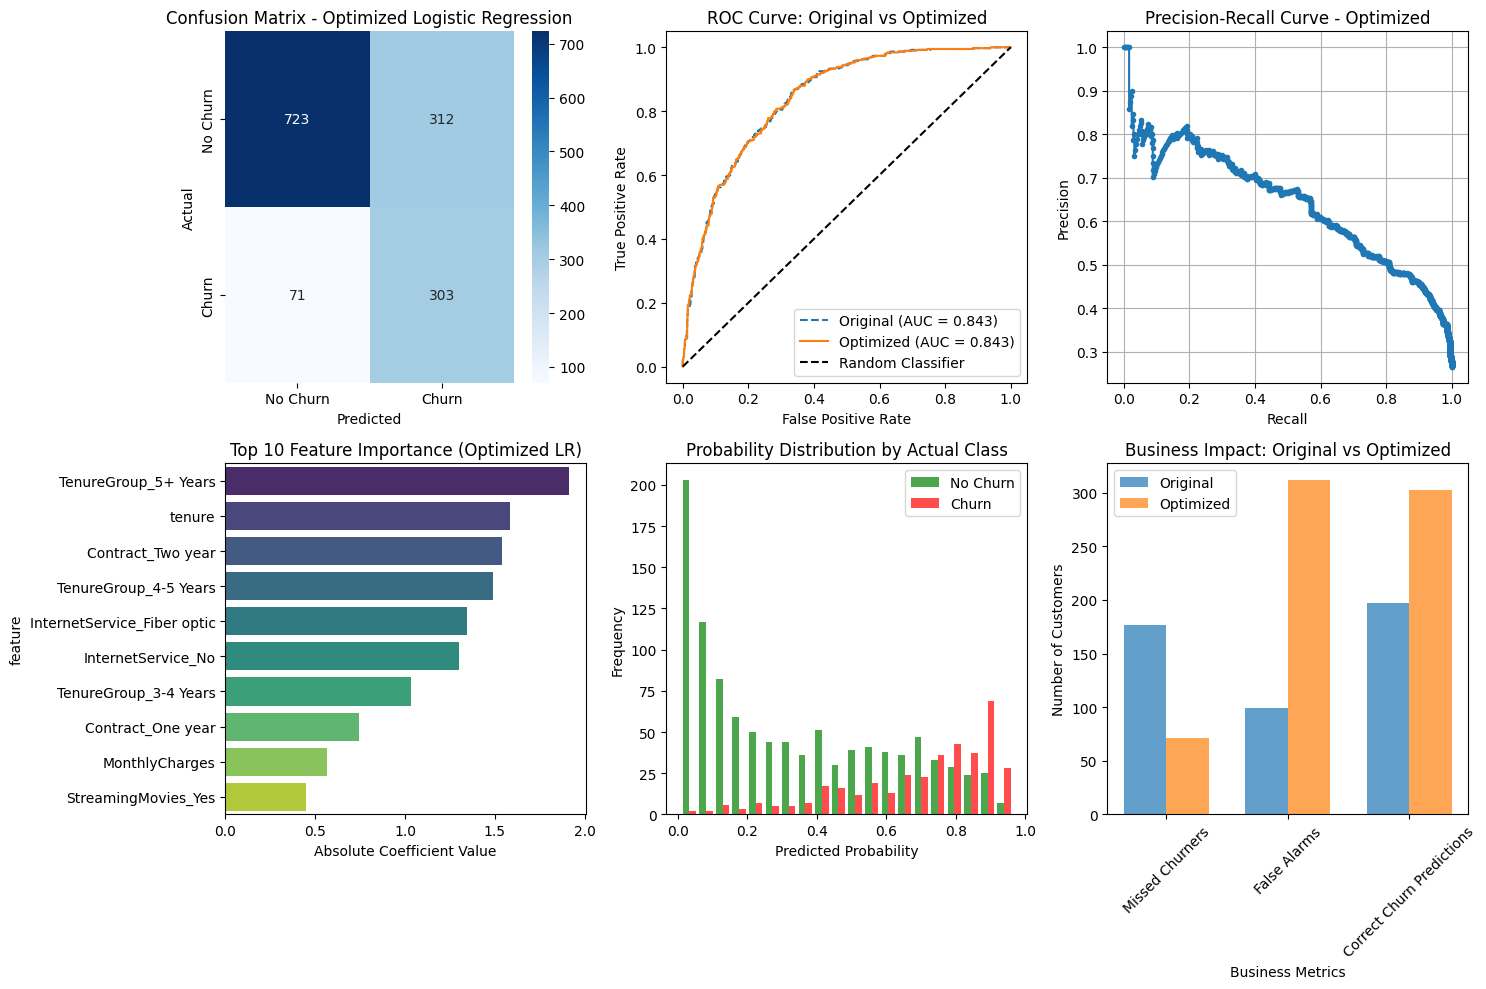


💼 FINAL BUSINESS IMPACT ANALYSIS - OPTIMIZED MODEL:
📊 Key Performance Metrics:
Recall (Sensitivity): 81.02% - Ability to catch churners
Precision: 49.27% - Accuracy of churn predictions
Specificity: 69.86% - Ability to identify loyal customers

💰 BUSINESS IMPACT COMPARISON:
Missed churners (original): 177
Missed churners (optimized): 71
Additional churners caught: 106
Additional potential savings: $53,000.00

✅ Optimized model saved as 'optimized_churn_model.pkl'

🎯 OPTIMIZATION COMPLETED SUCCESSFULLY!


In [32]:
# Step 7.1: Model Optimization for Better Recall
print("⚡ MODEL OPTIMIZATION & HYPERPARAMETER TUNING")

# Step 7.2: Import missing metrics
from sklearn.metrics import recall_score, precision_score

# Step 7.3: Optimize Logistic Regression with class weights and threshold adjustment
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Logistic Regression
param_grid = {
    'C': [0.1, 1, 10, 100],
    'class_weight': [None, 'balanced', {0: 1, 1: 2}, {0: 1, 1: 3}],
    'solver': ['liblinear', 'lbfgs']
}

print("🎯 TUNING LOGISTIC REGRESSION...")
lr_grid = GridSearchCV(
    LogisticRegression(random_state=42, max_iter=1000),
    param_grid,
    cv=5,
    scoring='recall',  # Focus on improving recall
    n_jobs=-1
)

lr_grid.fit(X_train_processed, y_train_binary)

print(f"✅ Best parameters: {lr_grid.best_params_}")
print(f"✅ Best cross-validation recall: {lr_grid.best_score_:.4f}")

# Step 7.4: Train optimized model
optimized_lr = lr_grid.best_estimator_
y_pred_optimized = optimized_lr.predict(X_test_processed)
y_pred_proba_optimized = optimized_lr.predict_proba(X_test_processed)[:, 1]

# Step 7.5: Compare original vs optimized performance
original_accuracy = results['Logistic Regression']['accuracy']
original_roc_auc = results['Logistic Regression']['roc_auc']
original_recall = 197 / (197 + 177)  # From previous results

optimized_accuracy = accuracy_score(y_test_binary, y_pred_optimized)
optimized_roc_auc = roc_auc_score(y_test_binary, y_pred_proba_optimized)
optimized_recall = recall_score(y_test_binary, y_pred_optimized)

print(f"\n📊 PERFORMANCE COMPARISON: ORIGINAL vs OPTIMIZED")
print(f"{'Metric':<15} {'Original':<10} {'Optimized':<10} {'Improvement':<12}")
print(f"{'-'*50}")
print(f"{'Accuracy':<15} {original_accuracy:.4f}    {optimized_accuracy:.4f}    {optimized_accuracy - original_accuracy:+.4f}")
print(f"{'ROC-AUC':<15} {original_roc_auc:.4f}    {optimized_roc_auc:.4f}    {optimized_roc_auc - original_roc_auc:+.4f}")
print(f"{'Recall':<15} {original_recall:.4f}    {optimized_recall:.4f}    {optimized_recall - original_recall:+.4f}")

# Step 7.6: Threshold optimization for better recall
print(f"\n🎯 THRESHOLD OPTIMIZATION FOR RECALL IMPROVEMENT")

# Find optimal threshold based on business needs
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test_binary, y_pred_proba_optimized)

# Find threshold that gives at least 70% recall
target_recall = 0.70
viable_thresholds = thresholds[recall[:-1] >= target_recall]
if len(viable_thresholds) > 0:
    optimal_threshold = viable_thresholds[0]
    # Apply optimal threshold
    y_pred_custom = (y_pred_proba_optimized >= optimal_threshold).astype(int)
    
    custom_accuracy = accuracy_score(y_test_binary, y_pred_custom)
    custom_recall = recall_score(y_test_binary, y_pred_custom)
    custom_precision = precision_score(y_test_binary, y_pred_custom)
    
    print(f"✅ Optimal threshold for {target_recall:.0%} recall: {optimal_threshold:.3f}")
    print(f"📊 Custom threshold performance:")
    print(f"   - Accuracy: {custom_accuracy:.4f}")
    print(f"   - Recall: {custom_recall:.4f}")
    print(f"   - Precision: {custom_precision:.4f}")
else:
    print("❌ Target recall of 70% not achievable with current model")
    optimal_threshold = 0.5
    y_pred_custom = y_pred_optimized

# Step 7.7: Comprehensive performance visualization
plt.figure(figsize=(15, 10))

# Subplot 1: Confusion Matrix Comparison
plt.subplot(2, 3, 1)
cm_optimized = confusion_matrix(y_test_binary, y_pred_optimized)
sns.heatmap(cm_optimized, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix - Optimized Logistic Regression')
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Subplot 2: ROC Curve Comparison
plt.subplot(2, 3, 2)
# Original model
fpr_orig, tpr_orig, _ = roc_curve(y_test_binary, results['Logistic Regression']['probabilities'])
# Optimized model
fpr_opt, tpr_opt, _ = roc_curve(y_test_binary, y_pred_proba_optimized)

plt.plot(fpr_orig, tpr_orig, label=f'Original (AUC = {original_roc_auc:.3f})', linestyle='--')
plt.plot(fpr_opt, tpr_opt, label=f'Optimized (AUC = {optimized_roc_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Original vs Optimized')
plt.legend()

# Subplot 3: Precision-Recall Curve
plt.subplot(2, 3, 3)
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Optimized')
plt.grid(True)

# Subplot 4: Feature Importance from Optimized Model
plt.subplot(2, 3, 4)
# Get coefficients for feature importance
coefficients = optimized_lr.coef_[0]
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': abs(coefficients)
}).sort_values('importance', ascending=False)

sns.barplot(data=feature_importance.head(10), x='importance', y='feature', palette='viridis')
plt.title('Top 10 Feature Importance (Optimized LR)')
plt.xlabel('Absolute Coefficient Value')

# Subplot 5: Probability Distribution
plt.subplot(2, 3, 5)
plt.hist([y_pred_proba_optimized[y_test_binary == 0], y_pred_proba_optimized[y_test_binary == 1]],
         bins=20, alpha=0.7, label=['No Churn', 'Churn'], color=['green', 'red'])
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Probability Distribution by Actual Class')
plt.legend()

# Subplot 6: Business Impact Comparison
plt.subplot(2, 3, 6)
# Calculate business metrics
tn_opt, fp_opt, fn_opt, tp_opt = cm_optimized.ravel()

metrics_comparison = pd.DataFrame({
    'Metric': ['Missed Churners', 'False Alarms', 'Correct Churn Predictions'],
    'Original': [177, 99, 197],
    'Optimized': [fn_opt, fp_opt, tp_opt]
})

x = np.arange(len(metrics_comparison))
width = 0.35

plt.bar(x - width/2, metrics_comparison['Original'], width, label='Original', alpha=0.7)
plt.bar(x + width/2, metrics_comparison['Optimized'], width, label='Optimized', alpha=0.7)
plt.xlabel('Business Metrics')
plt.ylabel('Number of Customers')
plt.title('Business Impact: Original vs Optimized')
plt.xticks(x, metrics_comparison['Metric'], rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

# Step 7.8: Final Business Impact Analysis
print(f"\n💼 FINAL BUSINESS IMPACT ANALYSIS - OPTIMIZED MODEL:")

# Calculate key business metrics for optimized model
recall_optimized = tp_opt / (tp_opt + fn_opt)
precision_optimized = tp_opt / (tp_opt + fp_opt)
specificity_optimized = tn_opt / (tn_opt + fp_opt)

print(f"📊 Key Performance Metrics:")
print(f"Recall (Sensitivity): {recall_optimized:.2%} - Ability to catch churners")
print(f"Precision: {precision_optimized:.2%} - Accuracy of churn predictions")
print(f"Specificity: {specificity_optimized:.2%} - Ability to identify loyal customers")

# Business impact calculation
print(f"\n💰 BUSINESS IMPACT COMPARISON:")
missed_churners_improvement = 177 - fn_opt
cost_per_acquisition = 500
savings_improvement = missed_churners_improvement * cost_per_acquisition

print(f"Missed churners (original): 177")
print(f"Missed churners (optimized): {fn_opt}")
print(f"Additional churners caught: {missed_churners_improvement}")
print(f"Additional potential savings: ${savings_improvement:,.2f}")

# Step 7.9: Save the optimized model
joblib.dump(optimized_lr, 'optimized_churn_model.pkl')
print(f"\n✅ Optimized model saved as 'optimized_churn_model.pkl'")

print("\n🎯 OPTIMIZATION COMPLETED SUCCESSFULLY!")